# Prática Análise de Dados

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics  as sts
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("churn.csv")
df.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,Cartao_Credito,Ativo,Salario,Churn
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [73]:
df = df.drop(columns=['Patrimonio','Produtos'])
df.head()

,Id,Score,Estado,Genero,Idade,Saldo,Cartao_Credito,Ativo,Salario,Churn
0,1,619,RS,Feminino,42,0,1,1,10134888.0,1
1,2,608,SC,Feminino,41,8380786,0,1,11254258.0,0
2,3,502,RS,Feminino,42,1596608,1,0,11393157.0,1
3,4,699,RS,Feminino,39,0,0,0,9382663.0,0
4,5,850,SC,Feminino,43,12551082,1,1,790841.0,0


In [74]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())
  
show_info(df)

DATASET SHAPE:  (998, 10) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              998 non-null    int64  
 1   Score           998 non-null    int64  
 2   Estado          998 non-null    object 
 3   Genero          998 non-null    object 
 4   Idade           998 non-null    int64  
 5   Saldo           998 non-null    int64  
 6   Cartao_Credito  998 non-null    int64  
 7   Ativo           998 non-null    int64  
 8   Salario         998 non-null    float64
 9   Churn           998 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 78.1+ KB
None

 --------------------------------------------------
NUMBER OF UNIQUE VALUES PER FEATURE: 

Id                998
Score             354
Estado              3
Genero              2
Idade   

### Análise Descritiva

In [75]:
df.columns

Index(['Id', 'Score', 'Estado', 'Genero', 'Idade', 'Saldo', 'Cartao_Credito',
       'Ativo', 'Salario', 'Churn'],
      dtype='object')

In [76]:
df["Cartao_Credito"] = df["Cartao_Credito"].map({ 0 : 'Não', 1 : 'Sim'})
df["Ativo"] = df["Ativo"].map({ 0 : 'Não', 1 : 'Sim'})
df["Churn"] = df["Churn"].map({ 0 : 'Não', 1 : 'Sim'})

In [77]:
numerical = ['Score','Idade','Saldo','Salario']

In [78]:
#substituir
df.loc[(df['Idade'] ==  0, 'Idade' )] = sts.median(df['Idade'])

In [79]:
df[numerical].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Score,998.0,648.61,98.31,376.0,580.0,653.00,721.00,850.0
Idade,998.0,39.09,10.31,18.0,32.0,37.00,44.00,82.0
Saldo,998.0,7162422.93,6314508.04,0.0,0.0,8926348.50,12587669.50,21177431.0
Salario,998.0,8782277.09,6066205.16,9677.0,2849010.5,8635279.25,13914466.25,19972539.0


In [80]:
CV_Score = sts.stdev(df['Score'])/sts.mean(df['Score'])
CV_Idade = sts.stdev(df['Idade'])/sts.mean(df['Idade'])
CV_Saldo = sts.stdev(df['Saldo'])/sts.mean(df['Saldo'])
CV_Salario = sts.stdev(df['Salario'])/sts.mean(df['Salario'])

print('CV_Score: \n',round(CV_Score,2))
print('CV_Idade: \n',round(CV_Idade,2))
print('CV_Saldo: \n',round(CV_Saldo,2))
print('CV_Salario: \n',round(CV_Salario,2))

CV_Score: 
 0.15
CV_Idade: 
 0.26
CV_Saldo: 
 0.88
CV_Salario: 
 0.69


### Perfil dos Clientes

*  A idade dos clientes varia de 18 à 82 anos. Com média de 39 e 75% tem idade até 44 anos.
*  53% são homens.
*  48% são do Rio Grande do Sul.
*  70% possuem cartão de crédito.
*  51% estão ativos.
*  25% possuem score entre 721 e 850.

In [81]:
df['Estado'].value_counts(normalize=True)

RS    0.483968
SC    0.258517
PR    0.257515
Name: Estado, dtype: float64

In [82]:
df['Genero'].value_counts(normalize=True)

Masculino    0.536072
Feminino     0.463928
Name: Genero, dtype: float64

In [83]:
df['Cartao_Credito'].value_counts(normalize=True)

Sim    0.703407
Não    0.296593
Name: Cartao_Credito, dtype: float64

In [84]:
df['Ativo'].value_counts(normalize=True)

Sim    0.51002
Não    0.48998
Name: Ativo, dtype: float64

C:\Users\Semantix\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Churn')

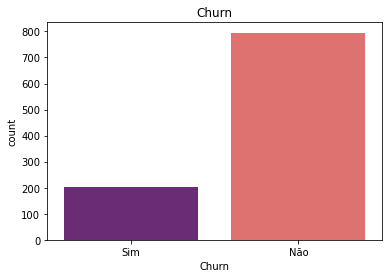

In [85]:
sns.countplot(df['Churn'], palette='magma').set_title('Churn')

C:\Users\Semantix\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Idade')

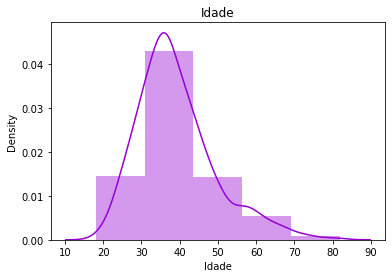

In [86]:
sns.distplot(df['Idade'], bins=5, rug=False, color='darkviolet').set_title('Idade')

C:\Users\Semantix\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Idade')

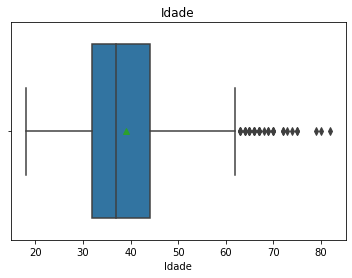

In [87]:
sns.boxplot(df['Idade'], showmeans=True).set_title('Idade')

Se a intenção é conhecer a distribuição, ou seja, a classe modal, assimetria, fazer histograma. Podemos estudar o comportamento dos outliers.

### Análise Bivariada

**Será que estamos perdendo mais clientes algum estado?**

C:\Users\Semantix\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Estado', ylabel='count'>

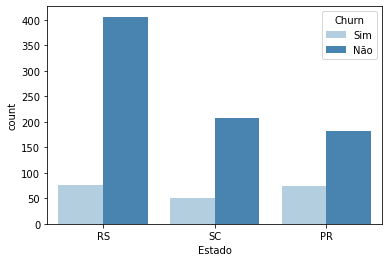

In [88]:
sns.countplot(df['Estado'], hue=df.Churn, palette='Blues')

**Será que a idade pode influenciar na perda de clientes?**

<AxesSubplot:xlabel='Churn', ylabel='Idade'>

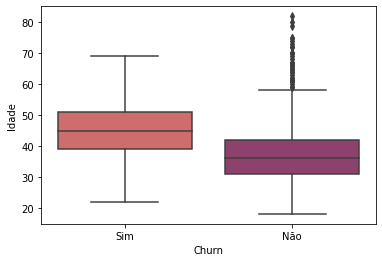

In [89]:
sns.boxplot(data=df, x="Churn", y="Idade",palette='flare')

<AxesSubplot:xlabel='Estado', ylabel='Idade'>

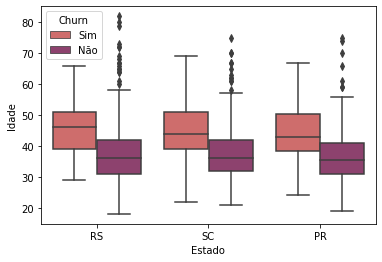

In [90]:
sns.boxplot(x="Estado", y="Idade", hue="Churn", data=df, palette='flare')

In [94]:
va_correlacao = df[['Score','Idade','Saldo','Salario','Churn']]
va_correlacao.corr()

,Score,Idade,Saldo,Salario
Score,1.000000,-0.028827,0.058345,0.022935
Idade,-0.028827,1.000000,-0.004959,-0.007752
Saldo,0.058345,-0.004959,1.000000,-0.021627
Salario,0.022935,-0.007752,-0.021627,1.000000


<Figure size 720x504 with 0 Axes>

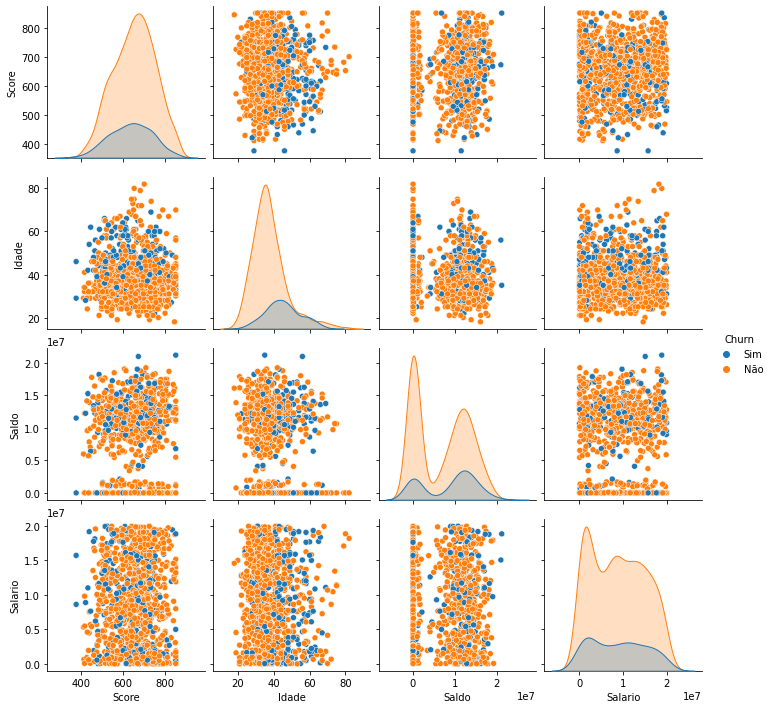

In [95]:
plt.figure(figsize=(10,7))
sns.pairplot(data=va_correlacao, hue="Churn")